In [59]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import mannwhitneyu
import re

Loading the initial data

In [60]:
df = pd.read_csv("preride_data.csv")

In [61]:
df

,Timestamp,System,"Do you get motion sickness when looking at visual media (e.g., emails, videos, etc.) in cars/vehicles?","If you need to go somewhere by car, which would you prefer?","Do you use a GPS/geography-based app? If so, which do you use?",Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.],Have you ridden in a semi-autonomous or self-driving vehicle before?,...,Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain],Name,Age,Gender,Occupation,Highest level of education you have completed or currently pursuing
0,NaN,Julie,No,Drive myself,Google Maps,Agree,Agree,Agree,Neutral,No,...,Disagree,Disagree,Neutral,Agree,Disagree,babak mortezai,54,Male,manager,Bachelor's degree
1,7/27/18 10:41,Lily,No,Ask friend or family member to drive,Google Maps,Strongly agree,Agree,Agree,Disagree,No,...,Disagree,Agree,Strongly agree,Neutral,Neutral,daniel landes,54,Male,writer,Bachelor's degree
2,7/31/18 13:08,Julie,No,Drive myself,Google Maps,Agree,Agree,Agree,Disagree,No,...,Agree,Disagree,Agree,Agree,Disagree,Kevin Goncalves,26,Male,Graduate Student,Doctoral degree
3,8/3/18 10:46,Julie,Sometimes,Drive myself,Apple Maps,Strongly agree,Agree,Agree,Agree,No,...,Agree,Neutral,Agree,Neutral,Agree,Cortney Miller,29,Female,PhD student,Doctoral degree
4,8/3/18 12:09,Lily,No,Drive myself,Google Maps,Agree,Agree,Agree,Neutral,Yes,...,Disagree,Agree,Neutral,Disagree,Agree,Michelle Blum Atkinson,33,Female,Software,Bachelor's degree
5,8/6/18 14:37,Julie,No,Ask friend or family member to drive,Google Maps,Agree,Neutral,Agree,Agree,No,...,Neutral,Agree,Neutral,Agree,Agree,Ashwini Gujar,35,Female,"Director, IT",Bachelor's degree
6,8/7/18 11:48,Lily,Sometimes,Drive myself,Google Maps,Agree,Agree,Agree,Agree,No,...,Neutral,Disagree,Disagree,Neutral,Disagree,Paula Aguilar,40,Female,Academic advisor,Master's degree
7,8/7/18 13:06,Julie,rarely,Drive myself,Google Maps,Agree,Agree,Neutral,Neutral,No,...,Disagree,Agree,Neutral,Neutral,Neutral,Nadine Nagy,37,Female,Staff scientist,Post-doctoral degree
8,8/7/18 14:41,Lily,Sometimes,Take bus or train,Google Maps,Agree,Agree,Neutral,Disagree,No,...,NaN,NaN,NaN,NaN,NaN,Daniel Kharitonov,34,Male,student,Master's degree
9,8/10/18 10:50,Julie,No,Drive myself,Google Maps,Agree,Agree,Agree,Disagree,No,...,Strongly disagree,Agree,Agree,Neutral,Agree,Hollie Meier,49,Female,Dental Hygienist,Bachelor's degree


In [62]:
df.shape

(22, 39)

In [63]:
# remove timestamp
df = df[df.columns[1:]]
# remove names
df = df.drop(df.columns[33],axis=1)

In [64]:
group_by_system = df.groupby(['System'])

An equal number of participants have been assigned to Julie and Lily

In [65]:
group_by_system.size()

System
Julie    11
Lily     11
dtype: int64

In [66]:
df.head()

,System,"Do you get motion sickness when looking at visual media (e.g., emails, videos, etc.) in cars/vehicles?","If you need to go somewhere by car, which would you prefer?","Do you use a GPS/geography-based app? If so, which do you use?",Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.],Have you ridden in a semi-autonomous or self-driving vehicle before?,"If you have ridden in a semi-autonomous or self-driving vehicle before, please specify which (e.g., Google car, Tesla, etc).",...,Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Lethargic],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain],Age,Gender,Occupation,Highest level of education you have completed or currently pursuing
0,Julie,No,Drive myself,Google Maps,Agree,Agree,Agree,Neutral,No,NaN,...,Disagree,Disagree,Disagree,Neutral,Agree,Disagree,54,Male,manager,Bachelor's degree
1,Lily,No,Ask friend or family member to drive,Google Maps,Strongly agree,Agree,Agree,Disagree,No,NaN,...,Strongly disagree,Disagree,Agree,Strongly agree,Neutral,Neutral,54,Male,writer,Bachelor's degree
2,Julie,No,Drive myself,Google Maps,Agree,Agree,Agree,Disagree,No,NaN,...,Agree,Agree,Disagree,Agree,Agree,Disagree,26,Male,Graduate Student,Doctoral degree
3,Julie,Sometimes,Drive myself,Apple Maps,Strongly agree,Agree,Agree,Agree,No,NaN,...,Neutral,Agree,Neutral,Agree,Neutral,Agree,29,Female,PhD student,Doctoral degree
4,Lily,No,Drive myself,Google Maps,Agree,Agree,Agree,Neutral,Yes,Tesla Autopilot 2,...,Disagree,Disagree,Agree,Neutral,Disagree,Agree,33,Female,Software,Bachelor's degree


## Perspectives on rideshare (Lyft/Uber): 4 questions

Here we get only the questions that deal with rideshare and assign the Likert scale responses numerical values as follows:
'Strongly disagree':1,'Disagree':2,'Neutral':3,'Agree':4,'Strongly agree':5

In [67]:
lyft_uber_views = df[df.columns[:8]]
lyft_uber_views = lyft_uber_views.drop(lyft_uber_views.columns[1:4],axis=1)
lyft_uber_views = lyft_uber_views.replace({'Strongly disagree':1,'Disagree':2,'Neutral':3,'Agree':4,'Strongly agree':5})
lyft_uber_views.head()

,System,Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.]
0,Julie,4,4,4,3
1,Lily,5,4,4,2
2,Julie,4,4,4,2
3,Julie,5,4,4,4
4,Lily,4,4,4,3


Getting the average response per group for rideshare questions

In [68]:
lyft_uber_views_group_by_system = lyft_uber_views.groupby(['System'])
lyft_uber_views_group_by_system.mean()

,Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.]
System,,,,
Julie,4.363636,4.181818,4.181818,3.272727
Lily,4.181818,4.090909,3.818182,2.909091


In [69]:
lyft_uber_views[lyft_uber_views.columns[1:5]].aggregate(axis = 1, func = sum)

0     15
1     15
2     14
3     17
4     15
5     15
6     16
7     14
8     13
9     14
10    18
11    16
12    11
13    14
14    12
15    18
16    15
17    19
18    18
19    17
20    16
21    19
dtype: int64

In [70]:
df_rideshare = df.assign(Rideshare = lyft_uber_views[lyft_uber_views.columns[1:5]].aggregate(axis = 1, func = sum))

In [71]:
df_rideshare.head()

,System,"Do you get motion sickness when looking at visual media (e.g., emails, videos, etc.) in cars/vehicles?","If you need to go somewhere by car, which would you prefer?","Do you use a GPS/geography-based app? If so, which do you use?",Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.],Have you ridden in a semi-autonomous or self-driving vehicle before?,"If you have ridden in a semi-autonomous or self-driving vehicle before, please specify which (e.g., Google car, Tesla, etc).",...,Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain],Age,Gender,Occupation,Highest level of education you have completed or currently pursuing,Rideshare
0,Julie,No,Drive myself,Google Maps,Agree,Agree,Agree,Neutral,No,NaN,...,Disagree,Disagree,Neutral,Agree,Disagree,54,Male,manager,Bachelor's degree,15
1,Lily,No,Ask friend or family member to drive,Google Maps,Strongly agree,Agree,Agree,Disagree,No,NaN,...,Disagree,Agree,Strongly agree,Neutral,Neutral,54,Male,writer,Bachelor's degree,15
2,Julie,No,Drive myself,Google Maps,Agree,Agree,Agree,Disagree,No,NaN,...,Agree,Disagree,Agree,Agree,Disagree,26,Male,Graduate Student,Doctoral degree,14
3,Julie,Sometimes,Drive myself,Apple Maps,Strongly agree,Agree,Agree,Agree,No,NaN,...,Agree,Neutral,Agree,Neutral,Agree,29,Female,PhD student,Doctoral degree,17
4,Lily,No,Drive myself,Google Maps,Agree,Agree,Agree,Neutral,Yes,Tesla Autopilot 2,...,Disagree,Agree,Neutral,Disagree,Agree,33,Female,Software,Bachelor's degree,15


## Mann-Whitney U Test: Perspectives on rideshare

In [72]:
print(list(df_rideshare)[-1])

Rideshare


In [73]:
x = df_rideshare.loc[df_rideshare['System']=='Julie'][list(df_rideshare)[-1]]
y = df_rideshare.loc[df_rideshare['System']=='Lily'][list(df_rideshare)[-1]]
mannwhitneyu(x, y, alternative = 'two-sided')

MannwhitneyuResult(statistic=74.5, pvalue=0.36989955696598253)

Assuming $\alpha$ = 0.05, and given the resulting `p-value = 0.36989955696598253` we see there does not seem to be a significant difference between the two groups' perspectives on rideshare

## Demographics (age, gender, occupation, level of education)

In [74]:
demographics = df.drop(df.columns[1:-4],axis=1)
demographics.head()

,System,Age,Gender,Occupation,Highest level of education you have completed or currently pursuing
0,Julie,54,Male,manager,Bachelor's degree
1,Lily,54,Male,writer,Bachelor's degree
2,Julie,26,Male,Graduate Student,Doctoral degree
3,Julie,29,Female,PhD student,Doctoral degree
4,Lily,33,Female,Software,Bachelor's degree


Most common level of education: Bachelor's degree

In [75]:
demographics[demographics.columns[-1]].mode()

0    Bachelor's degree
dtype: object

All levels of education

In [76]:
demographics[demographics.columns[-1]].value_counts()

Bachelor's degree       11
Doctoral degree          6
Master's degree          3
Post-doctoral degree     1
High school diploma      1
Name: Highest level of education you have completed or currently pursuing, dtype: int64

Most common occupation: student

In [77]:
demographics[demographics.columns[-2]].mode()

0    Student
dtype: object

All occupations

In [78]:
demographics[demographics.columns[-2]].str.lower().value_counts()

student                           5
graduate student                  2
alumni relations manager (saa)    1
staff scientist                   1
director, it                      1
phd student                       1
academic advisor                  1
pharmacist                        1
dental hygienist                  1
front desk agent                  1
semi-retired                      1
manager                           1
marketing manager                 1
editor                            1
software                          1
accounting                        1
writer                            1
Name: Occupation, dtype: int64

Mean age: 38.0

In [79]:
demographics[demographics.columns[-4]].mean()

38.0

Range of ages: (20, 60)

In [80]:
(demographics[demographics.columns[-4]].min(), demographics[demographics.columns[-4]].max())

(20, 60)

Grouping by system, age, and occupation

In [81]:
demographics.groupby(['System','Age','Occupation']).size()

System  Age  Occupation                    
Julie   20   Student                           1
        25   Student                           1
        26   Graduate Student                  1
             Student                           1
        29   PhD student                       1
        35   Director, IT                      1
        37   Staff scientist                   1
        49   Dental Hygienist                  1
        51   Front Desk Agent                  1
        54   manager                           1
        60   accounting                        1
Lily    26   Marketing Manager                 1
        27   Student                           1
        28   Graduate Student                  1
        33   Software                          1
        34   student                           1
        40   Academic advisor                  1
             Editor                            1
        41   Pharmacist                        1
        46   Alumni Relat

## Adjectives participants used to describe a self-driving vehicle

Here we try sentiment analysis to look at the adjectives participants provided to describe a self-driving vehicle

Checking the number of words that is in the opinion lexicon dataset
SOURCE: http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

In [82]:
posArr = []
negArr = []
for word in open('positive-words.txt', 'r').readlines()[35:]:
    word = word.rstrip()
    posArr.append(word)
for word in open('negative-words.txt', 'r').readlines()[35:]:
    word = word.rstrip()
    negArr.append(word)
print ("num of positive words %d" % len(posArr))
print ("num of negative words %d" % len(negArr))

num of positive words 2006
num of negative words 4783


In [83]:
temp = df[df.columns[:-4]]
subj_words = temp.drop(temp.columns[1:-21],axis=1)

In [84]:
subj_words.shape

(22, 22)

First we create a dataframe that includes all questions of the form "Please choose the response that best represents how you perceive the self-driving vehicle..." (or similar) in which participants respond using a Likert scale or by filling in their own answer

In [85]:
subj_words.head()

,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.,Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Capable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Emotional],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Energetic],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Indifferent],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Methodical],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Predictable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Reliable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Safe],...,Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Bored],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Calm],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Defensive],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Excited],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Lethargic],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain]
0,Julie,fun smart safe good enjoy,Agree,Disagree,Agree,Disagree,Strongly agree,Agree,Agree,Agree,...,Disagree,Agree,Disagree,Strongly agree,Disagree,Disagree,Disagree,Neutral,Agree,Disagree
1,Lily,"effortless, pleasant, robotic, time-saving, zen",Neutral,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Neutral,Neutral,...,Disagree,Neutral,Neutral,Agree,Strongly disagree,Disagree,Agree,Strongly agree,Neutral,Neutral
2,Julie,NaN,Agree,Disagree,Disagree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Disagree,Disagree,Agree,Agree,Disagree,Agree,Agree,Disagree
3,Julie,"smooth, safe, intuitive, automated, easy",Agree,Disagree,Neutral,Agree,Neutral,Agree,Agree,Agree,...,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Neutral,Agree,Neutral,Agree
4,Lily,"safe, freedom, easy, self-sufficient, slow",Agree,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,...,Disagree,Neutral,Agree,Agree,Disagree,Disagree,Agree,Neutral,Disagree,Agree


Creating a dataframe with responses from the question "Provide 5 words (adjectives) to characterize/describe a self-driving vehicle."

In [86]:
adjs = subj_words[subj_words.columns[:2]]

In [87]:
adjs.head()

,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.
0,Julie,fun smart safe good enjoy
1,Lily,"effortless, pleasant, robotic, time-saving, zen"
2,Julie,NaN
3,Julie,"smooth, safe, intuitive, automated, easy"
4,Lily,"safe, freedom, easy, self-sufficient, slow"


Removing NaN responses (namely, participants didn't answer this question). We see that 6 people didn't answer this question.

In [88]:
adjs2 = adjs.dropna()
print(len(adjs))
print(len(adjs)-len(adjs2)) # number of NaN, namely 6 people didn't provide adjs.

22
6


Dataframe without the NaN responses

In [89]:
adjs2

,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.
0,Julie,fun smart safe good enjoy
1,Lily,"effortless, pleasant, robotic, time-saving, zen"
3,Julie,"smooth, safe, intuitive, automated, easy"
4,Lily,"safe, freedom, easy, self-sufficient, slow"
6,Lily,"advanced, futuristic, expensive, efficient, in..."
7,Julie,"convenient, smart, effective, time saving, new"
8,Lily,exciting hitech cool fun unknown
9,Julie,"interesting, high-techy, scary, fascinating, s..."
11,Julie,"Trusting, high-tech, safer, blind-spot, futuri..."
12,Lily,simple beta future software assist


In [90]:
adjs2.shape

(16, 2)

In [91]:
for index, row in adjs2.iterrows():
    if ',' in row[1]:
        row[1] = re.split(', ',row[1])
    else:
        row[1] = re.split(' ', row[1])

In [92]:
adjs2

,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.
0,Julie,"[fun, smart, safe, good, enjoy]"
1,Lily,"[effortless, pleasant, robotic, time-saving, zen]"
3,Julie,"[smooth, safe, intuitive, automated, easy]"
4,Lily,"[safe, freedom, easy, self-sufficient, slow ]"
6,Lily,"[advanced, futuristic, expensive, efficient, i..."
7,Julie,"[convenient, smart, effective, time saving, new]"
8,Lily,"[exciting, hitech, cool, fun, unknown]"
9,Julie,"[interesting, high-techy, scary, fascinating, ..."
11,Julie,"[Trusting, high-tech, safer, blind-spot, futur..."
12,Lily,"[simple, beta, future, software, assist]"


In [93]:
adjs_group_by_system = adjs2.groupby(['System'])
adjs_group_by_system.count()

,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.
System,
Julie,8
Lily,8


In [94]:
adjs2Temp = adjs2
for index, row in adjs2Temp.iterrows():
    posNum = 0
    negNum = 0
    for word in row[1]:
        word = word.lower()
        if word in posArr:
            posNum += 1
        if word in negArr:
            negNum -= 1
    total = posNum + negNum
    #print(posNum, negNum)
    adjs2.loc[index,'Total'] = total

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [95]:
adjs2

,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.,Total
0,Julie,"[fun, smart, safe, good, enjoy]",5.0
1,Lily,"[effortless, pleasant, robotic, time-saving, zen]",2.0
3,Julie,"[smooth, safe, intuitive, automated, easy]",4.0
4,Lily,"[safe, freedom, easy, self-sufficient, slow ]",4.0
6,Lily,"[advanced, futuristic, expensive, efficient, i...",3.0
7,Julie,"[convenient, smart, effective, time saving, new]",3.0
8,Lily,"[exciting, hitech, cool, fun, unknown]",2.0
9,Julie,"[interesting, high-techy, scary, fascinating, ...",2.0
11,Julie,"[Trusting, high-tech, safer, blind-spot, futur...",2.0
12,Lily,"[simple, beta, future, software, assist]",0.0


In [96]:
(adjs2[adjs2.columns[2]].min(), adjs2[adjs2.columns[2]].max())

(0.0, 5.0)

In [97]:
adjs_group_by_system = adjs2.groupby(['System'])
adjs_group_by_system.sum()

,Total
System,
Julie,25.0
Lily,21.0


Julie had slightly more positive words

In [98]:
adjs_group_by_system.mean()

,Total
System,
Julie,3.125
Lily,2.625


In [99]:
adjs_group_by_system_total = adjs2.groupby(['System','Total'])
adjs_group_by_system_total.size()

System  Total
Julie   2.0      4
        3.0      1
        4.0      1
        5.0      2
Lily    0.0      1
        2.0      3
        3.0      2
        4.0      1
        5.0      1
dtype: int64

## Mann-Whitney U Test: Sentiment of adjectives used to describe a self-driving vehicle

In [100]:
julie_adj = adjs2.loc[adjs2['System']=="Julie"][adjs2.columns[2]]
lily_adj = adjs2.loc[adjs2['System']=="Lily"][adjs2.columns[2]]

In [101]:
julie_adj.mean()

3.125

In [102]:
lily_adj.mean()

2.625

In [103]:
mannwhitneyu(julie_adj, lily_adj, alternative = 'two-sided')

MannwhitneyuResult(statistic=36.5, pvalue=0.6586874174078845)

Assuming $\alpha$ = 0.05, and given the resulting `pvalue = 0.6586874174078845` we see there does not seem to be a significant difference between the sentiment of words the two groups used to describe a self-driving vehicle.

## Questions where participants asked to rate words on Likert scale

We use the `subj_words` dataframe from earlier and exclude the question in which participants wrote in their own adjectives

In [104]:
choice_words = subj_words.drop(subj_words.columns[1],axis=1)

In [105]:
choice_words

,System,Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Capable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Emotional],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Energetic],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Indifferent],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Methodical],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Predictable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Reliable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Safe],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Smart],...,Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Bored],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Calm],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Defensive],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Excited],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Lethargic],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain]
0,Julie,Agree,Disagree,Agree,Disagree,Strongly agree,Agree,Agree,Agree,Strongly agree,...,Disagree,Agree,Disagree,Strongly agree,Disagree,Disagree,Disagree,Neutral,Agree,Disagree
1,Lily,Neutral,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Neutral,Neutral,Neutral,...,Disagree,Neutral,Neutral,Agree,Strongly disagree,Disagree,Agree,Strongly agree,Neutral,Neutral
2,Julie,Agree,Disagree,Disagree,Agree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Disagree,Disagree,Agree,Agree,Disagree,Agree,Agree,Disagree
3,Julie,Agree,Disagree,Neutral,Agree,Neutral,Agree,Agree,Agree,Agree,...,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Neutral,Agree,Neutral,Agree
4,Lily,Agree,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Strongly agree,...,Disagree,Neutral,Agree,Agree,Disagree,Disagree,Agree,Neutral,Disagree,Agree
5,Julie,Agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Strongly agree,...,Disagree,Agree,Strongly agree,Strongly agree,Neutral,Neutral,Agree,Neutral,Ag

In [106]:
choice_words.shape

(22, 21)

Replacing NaN with 0

In [107]:
choice_words = choice_words.replace({'Strongly disagree': 1,'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly agree': 5})
choice_words = choice_words.fillna(0)
choice_words.groupby(['System']).mean()

,Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Capable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Emotional],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Energetic],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Indifferent],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Methodical],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Predictable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Reliable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Safe],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Smart],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Trustworthy],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Bored],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Calm],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Defensive],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Excited],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Lethargic],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain]
System,,,,,,,,,,,,,,,,,,,,
Julie,4.0,2.090909,2.727273,3.090909,3.636364,3.727273,4.000000,3.818182,4.000000,3.818182,2.545455,3.545455,2.545455,3.727273,2.545455,2.545455,2.636364,3.090909,3.727273,2.727273
Lily,4.0,2.000000,2.545455,3.090909,3.909091,3.636364,3.454545,3.363636,3.909091,3.363636,1.454545,2.454545,1.909091,2.909091,1.363636,2.000000,2.636364,2.272727,2.272727,2.454545


In [108]:
choice_words.groupby(['System']).sum()

,Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Capable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Emotional],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Energetic],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Indifferent],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Methodical],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Predictable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Reliable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Safe],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Smart],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Trustworthy],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Bored],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Calm],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Defensive],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Excited],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Lethargic],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain]
System,,,,,,,,,,,,,,,,,,,,
Julie,44,23,30,34,40,41,44,42,44,42,28.0,39.0,28.0,41.0,28.0,28.0,29.0,34.0,41.0,30.0
Lily,44,22,28,34,43,40,38,37,43,37,16.0,27.0,21.0,32.0,15.0,22.0,29.0,25.0,25.0,27.0


## Ignore charts for now - am redoing

In [109]:
%matplotlib inline

In [110]:
temp = choice_words[choice_words.columns[[0,1]]]

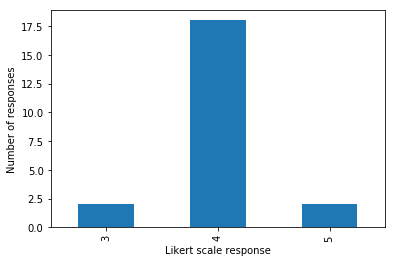

In [111]:
import matplotlib.pyplot as plt
temp = choice_words.drop(choice_words.columns[0:1],axis=1)
#temp[temp.columns[0]].value_counts()
data = pd.value_counts(temp[temp.columns[0]], sort=False)
data.plot(kind='bar')
plt.ylabel('Number of responses')
plt.xlabel('Likert scale response')
plt.show()

Distrubutions for responses don't seem to vary too much between groups, but there are noticable differences in the following questions (though it's important to remember that we're using small sample sizes for groups):

- lethargic (Julie higher than Lily)
- nervous (Lily higher than Julie)

Looking at these distributions, coupled w/ the means computed earlier, it doesn't seem that the two groups have too different of views on autonomous vehicles pre-ride.

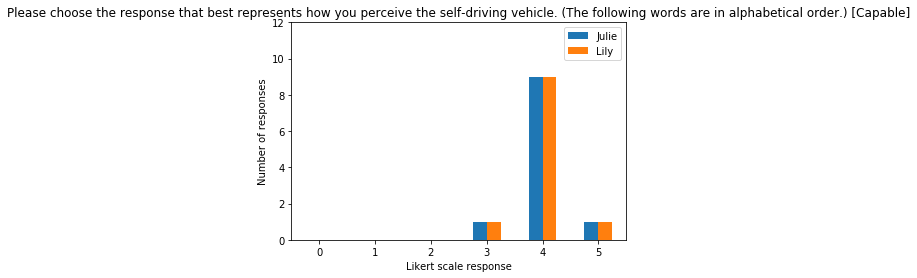

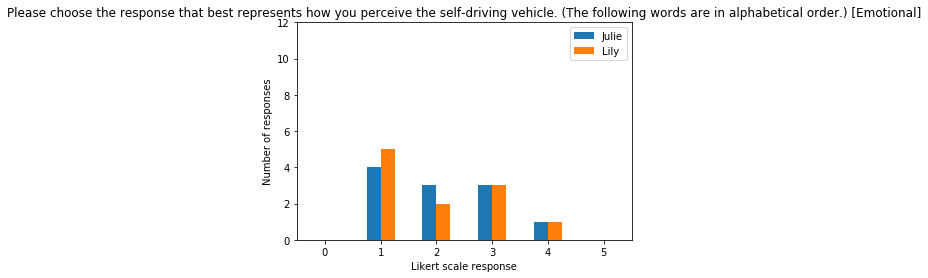

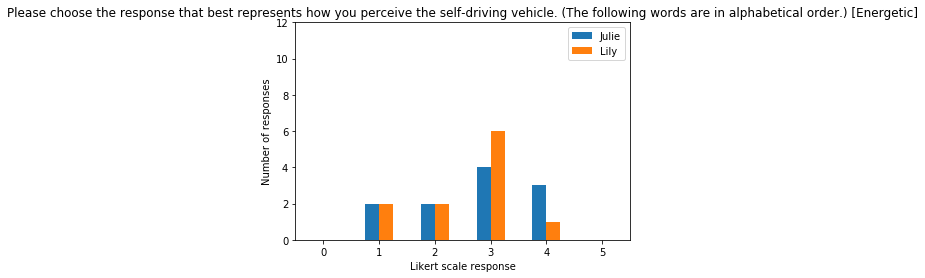

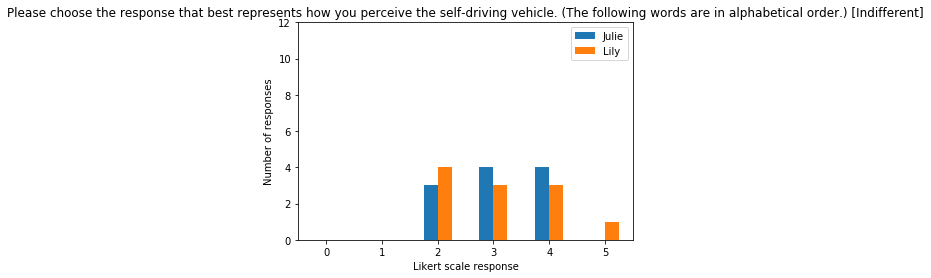

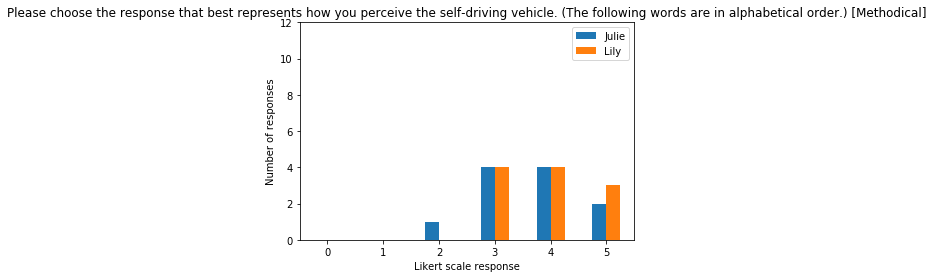

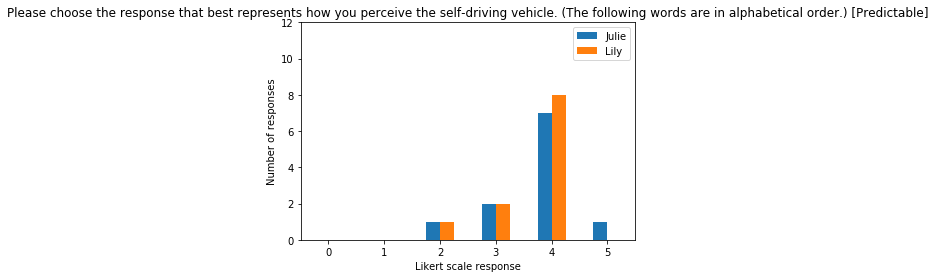

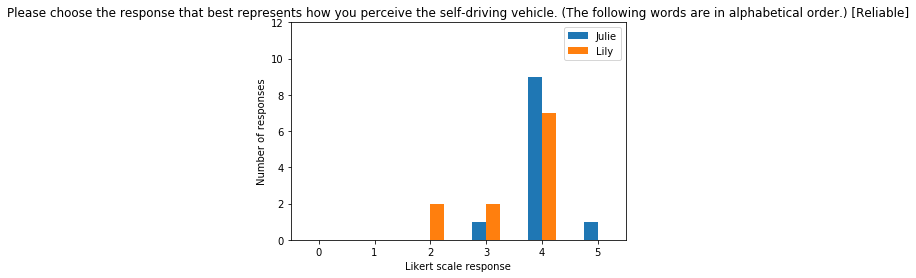

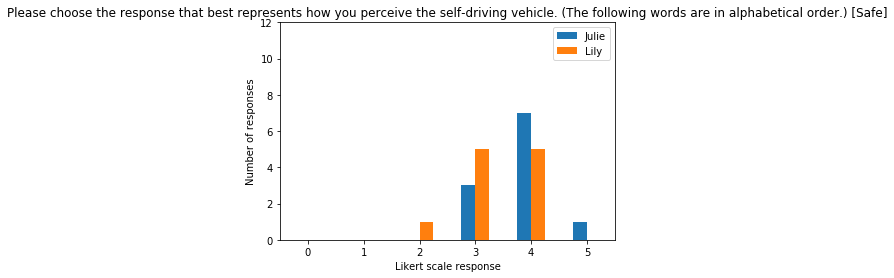

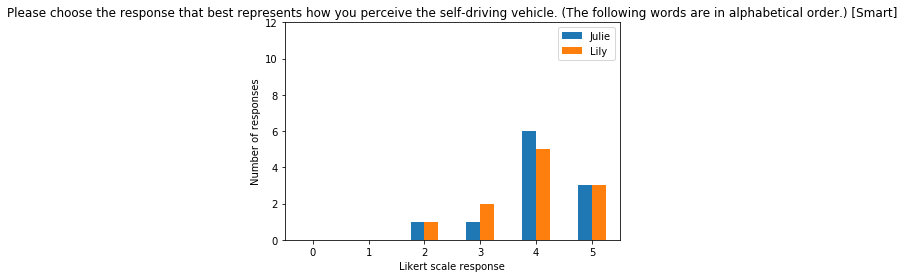

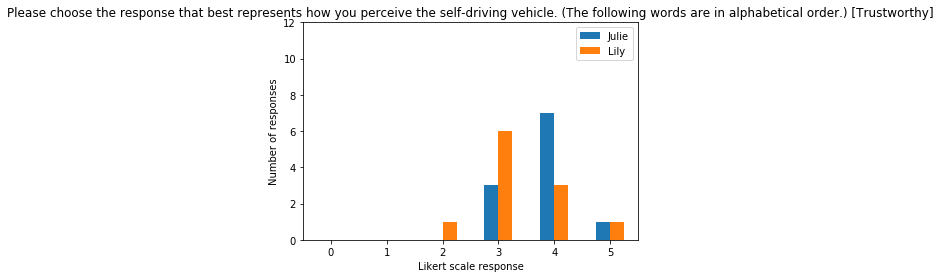

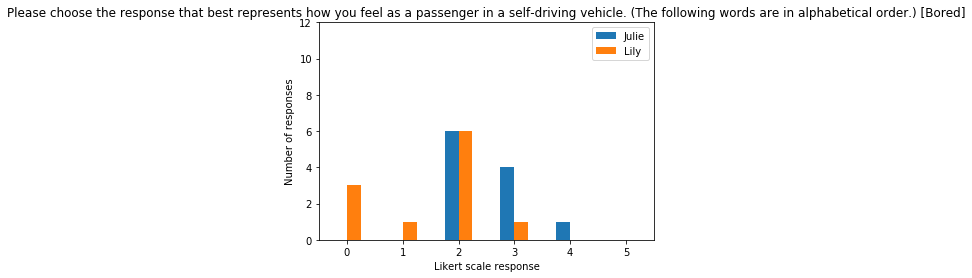

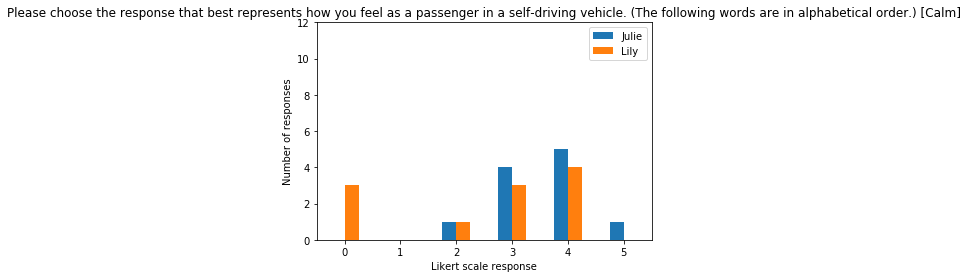

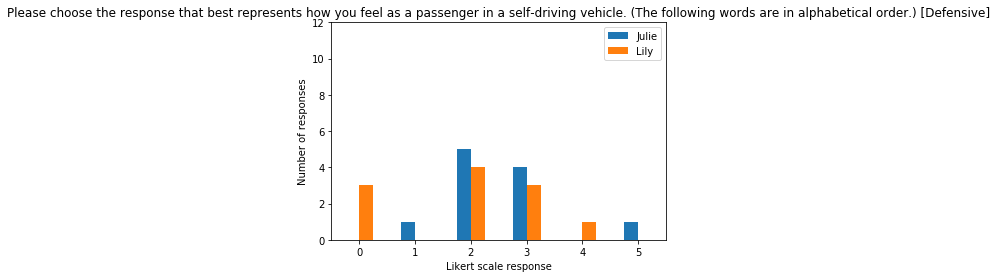

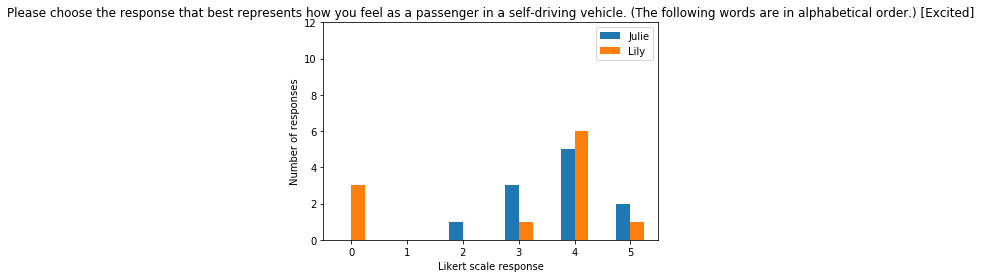

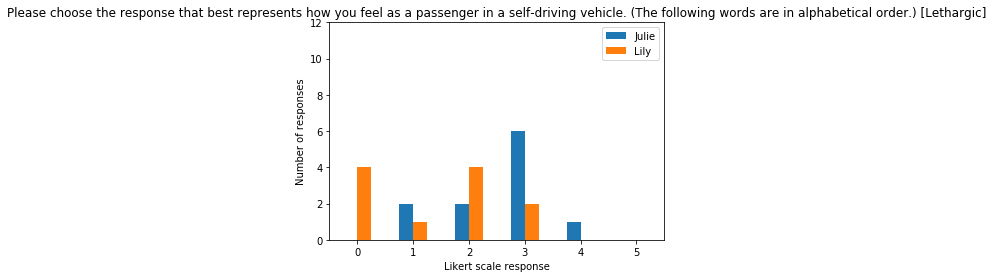

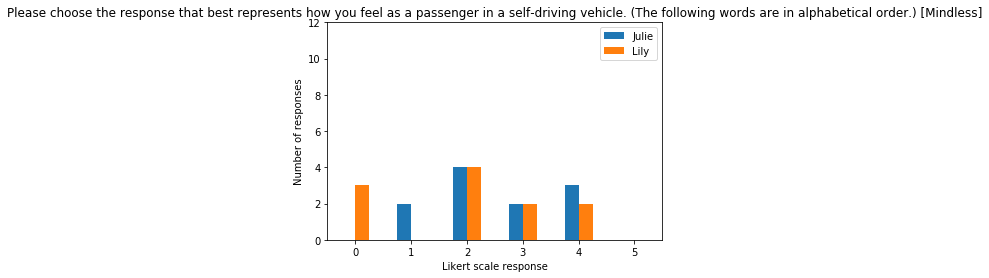

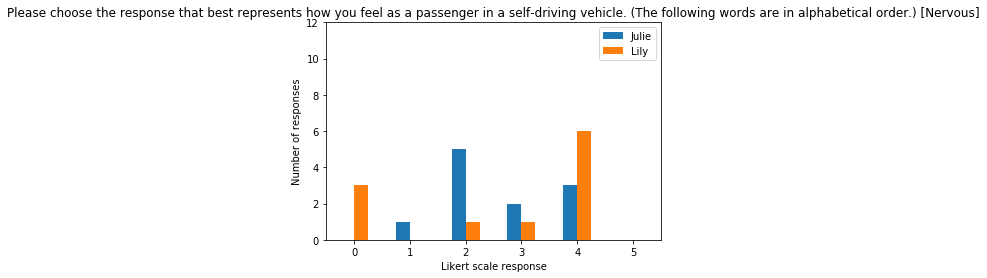

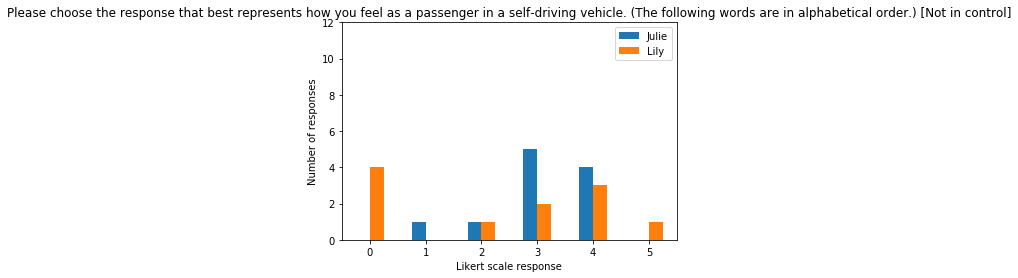

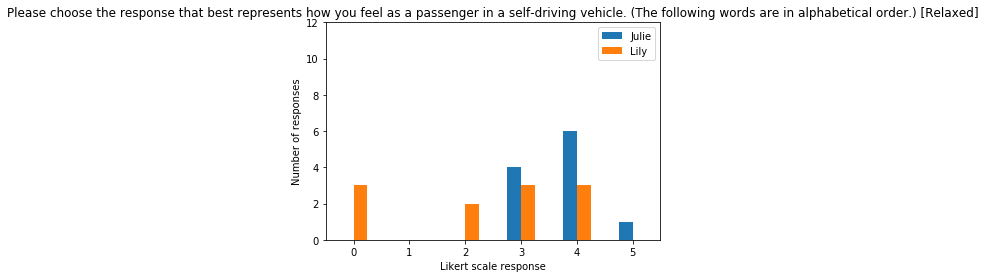

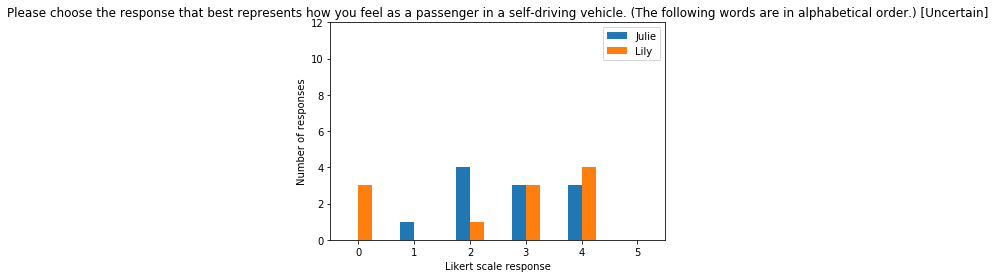

In [112]:
nums = [0,1,2,3,4,5]
for i in range(1,len(choice_words.columns)):
    temp = choice_words[choice_words.columns[[0,i]]]
    #vals = temp.groupby(['System'])[temp.columns[1]].value_counts(sort=False)
    g = temp.groupby(['System'])[temp.columns[1]].value_counts(sort=False)
    test = g['Julie'].reindex(nums,fill_value=0)
    test2 = g['Lily'].reindex(nums,fill_value=0)
    df = pd.concat([test,test2],axis=1)
    #print(df)
    ax = df.plot(kind='bar', legend=True)
    ax.legend(labels=['Julie','Lily'])
    plt.title(list(choice_words)[i])
    plt.ylim(0,12)
    plt.ylabel('Number of responses')
    plt.xlabel('Likert scale response')
    plt.xticks(rotation=0)
    #g2 = temp.groupby(['System'])[temp.columns[1]].value_counts(sort=False).unstack(0)
    #print(g2)

In [113]:
df = pd.read_csv("preride_data.csv")
df = df[df.columns[1:]]
df = df.drop(df.columns[33],axis=1)
#print(df.columns)
lyft_uber_views = df[df.columns[:8]]
lyft_uber_views = lyft_uber_views.drop(lyft_uber_views.columns[1:4],axis=1)
lyft_uber_views = lyft_uber_views.replace({'Strongly disagree':1,'Disagree':2,'Neutral':3,'Agree':4,'Strongly agree':5})
lyft_uber_views_group_by_system = lyft_uber_views.groupby(['System']).mean()
for i in range(0,len(lyft_uber_views_group_by_system.columns)):
    axs[i] = lyft_uber_views_group_by_system[lyft_uber_views_group_by_system.columns[[i]]]
    ax = axs[i].plot(kind='bar',legend=False, zorder=3)
    ax.grid(zorder=0)
    if i == 0:
        plt.title("I am usually comfortable being driven")
    elif i == 1:
        plt.title("I usually feel safe being driven")
    elif i == 2:
        plt.title("I usually trust the driver")
    elif i == 3:
        plt.title("I usually trust other drivers on the road")
    #plt.title(list(lyft_uber_views_group_by_system)[i])
    plt.xticks(rotation=0)
    plt.ylim(0,5)
    plt.yticks(np.arange(0, 5, .5))
    plt.ylabel('Mean response')

FileNotFoundError: [Errno 2] File b'/preride_data.csv' does not exist: b'/preride_data.csv'

In [ ]:
nums = [0,1,2,3,4,5]
for i in range(1,len(choice_words.columns)):
    if i in [1,2,15,17]:
        temp = choice_words[choice_words.columns[[0,i]]]
        g = temp.groupby(['System'])[temp.columns[1]].value_counts(sort=False)
        test = g['Julie'].reindex(nums,fill_value=0)
        test2 = g['Lily'].reindex(nums,fill_value=0)
        df = pd.concat([test,test2],axis=1)
        #print(df)
        ax = df.plot(kind='bar', legend=True)
        ax.legend(labels=['Julie','Lily'])
        #plt.title(list(choice_words)[i])
        if i == 1:
            plt.title("Capable")
        if i == 2:
            plt.title("Emotional")
        if i == 15:
            plt.title("Lethargic")
        if i == 17:
            plt.title("Nervous")
        plt.ylim(0,12)
        plt.ylabel('Number of responses')
        plt.xlabel('Likert scale response')
        plt.xticks(rotation=0)